In [1]:
import torch
from transformers import AutoImageProcessor,Swinv2Model,SwinModel,AutoModelForImageClassification
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [2]:
model=AutoModelForImageClassification.from_pretrained("microsoft/swin-base-patch4-window7-224-in22k")
processor=AutoImageProcessor.from_pretrained("microsoft/swin-base-patch4-window7-224-in22k")


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [6]:
model.parameters

<bound method Module.parameters of SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )


In [14]:
for param in model.parameters():
   param.requires_grad=False

In [15]:
trainable_params = [param for param in model.parameters() if param.requires_grad]
for i, param in enumerate(trainable_params, start=1):
    print(f"Trainable parameter {i}: {param.shape}")

In [11]:
inputs=processor(images=image,return_tensors="pt")
logits=model(**inputs)

In [12]:
logits


SwinImageClassifierOutput(loss=None, logits=tensor([[ 1.5411,  0.6423, -0.0876,  ...,  0.1995,  0.0383, -0.0151]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None, reshaped_hidden_states=None)

In [ ]:
output.logits.shape

In [ ]:
import matplotlib.pyplot as plt
import torch
plt.imshow(image)


In [ ]:
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][7]

In [ ]:
dataset

In [ ]:
plt.imshow(image)

In [48]:
import torch
from PIL import Image
from torchvision.transforms import functional as F
image='C:/Users/Iheb/Downloads/426720656_1156797782394624_7364390716649363469_n.jpg'
image1=Image.open(image)
image=F.resize(image1,(224,224))
image=F.to_tensor(image)

inputs=processor(images=image,return_tensors="pt")
with torch.no_grad():
    output=model(**inputs)

print(f"output dim {output.last_hidden_state.shape}")

    

output dim torch.Size([1, 49, 1024])


torch.Size([224, 224, 3])


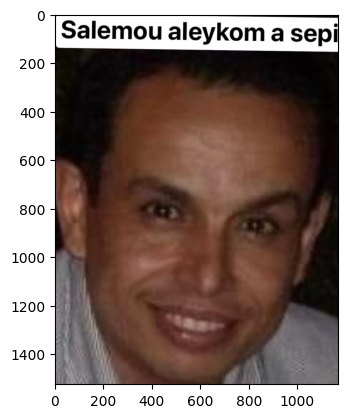

In [49]:
import matplotlib.pyplot as plt 

inv_img=torch.swapaxes(image,axis0=0,axis1=2)
print(inv_img.shape)
plt.imshow(image1)

In [19]:
with torch.no_grad():
    output=model(**inputs)
    
output.last_hidden_state


tensor([[[ 0.6159, -0.0037, -0.0483,  ...,  0.0177,  0.6865, -0.1919],
         [ 1.1177,  1.0504, -0.2075,  ..., -1.1187,  1.8733,  1.7558],
         [ 0.2358,  0.7224,  0.0350,  ..., -0.9563,  0.5278, -0.5316],
         ...,
         [-0.1783,  0.7055,  0.0297,  ..., -1.6116,  0.0353, -0.3355],
         [-0.1232, -0.0657,  0.0991,  ..., -1.2804, -0.3907,  0.8847],
         [ 0.7367, -0.1285, -0.0833,  ...,  0.0859,  0.7087, -0.2461]]])

In [32]:
output.last_hidden_state[0].shape

torch.Size([49, 1024])